In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
from scipy import stats
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
df = pd.read_csv("dataset_2.csv")
df.head()

,Id,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
0,1,6.1,4,4.4,4.2,0,5.5,Class_1
1,2,5.9,1,4.4,4.2,3,5.0,Class_1
2,3,5.7,4,4.3,4.2,2,5.2,Class_1
3,4,5.6,2,4.5,4.2,0,5.1,Class_1
4,5,6.0,5,4.4,4.2,1,5.6,Class_1


In [3]:
df.info()  #checking if there is any inconsistency in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 8 columns):
Id           150 non-null int64
Feature_1    150 non-null float64
Feature_2    150 non-null int64
Feature_3    150 non-null float64
Feature_4    150 non-null float64
Feature_5    150 non-null int64
Feature_6    150 non-null float64
Target       150 non-null object
dtypes: float64(4), int64(3), object(1)
memory usage: 9.5+ KB


In [4]:
df.shape #For checking the shape of the data

(150, 8)

In [15]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Target
Id,,,,,,,
1,6.1,4,4.4,4.2,0,5.5,Class_1
2,5.9,1,4.4,4.2,3,5.0,Class_1
3,5.7,4,4.3,4.2,2,5.2,Class_1
4,5.6,2,4.5,4.2,0,5.1,Class_1
5,6.0,5,4.4,4.2,1,5.6,Class_1


In [17]:
Counter(df.Target) #To count the number of target

Counter({'Class_1': 50, 'Class_2': 50, 'Class_3': 50})

In [18]:
df.isnull().sum().to_frame() # To check for the null values in the data

,0
Feature_1,0
Feature_2,0
Feature_3,0
Feature_4,0
Feature_5,0
Feature_6,0
Target,0


In [19]:
df.columns

Index(['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5',
       'Feature_6', 'Target'],
      dtype='object')

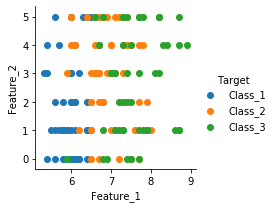

In [20]:
sns.FacetGrid(df,hue="Target",size=3).map(plt.scatter,"Feature_1","Feature_2").add_legend();
plt.show()

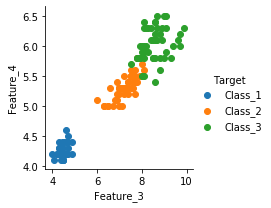

In [21]:
sns.FacetGrid(df,hue="Target",size=3).map(plt.scatter,"Feature_3","Feature_4").add_legend();
plt.show()

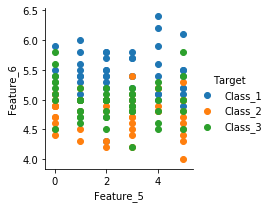

In [22]:
sns.FacetGrid(df,hue="Target",size=3).map(plt.scatter,"Feature_5","Feature_6").add_legend();
plt.show()

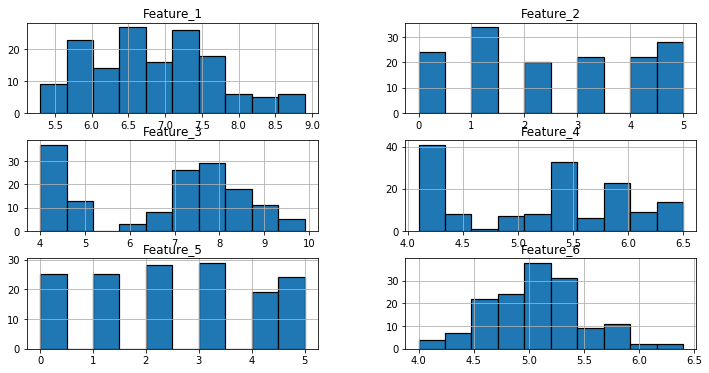

In [23]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

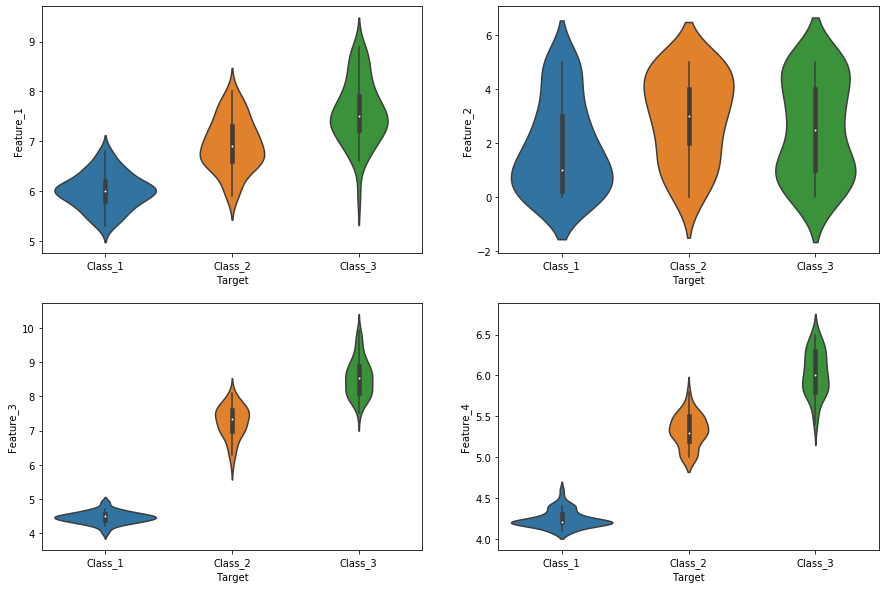

In [25]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Target',y='Feature_1',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Target',y='Feature_2',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Target',y='Feature_3',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Target',y='Feature_4',data=df)

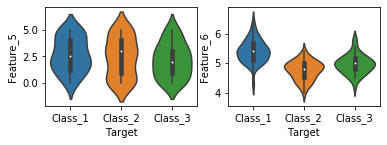

In [26]:
plt.subplot(2,2,3)
sns.violinplot(x='Target',y='Feature_5',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Target',y='Feature_6',data=df)

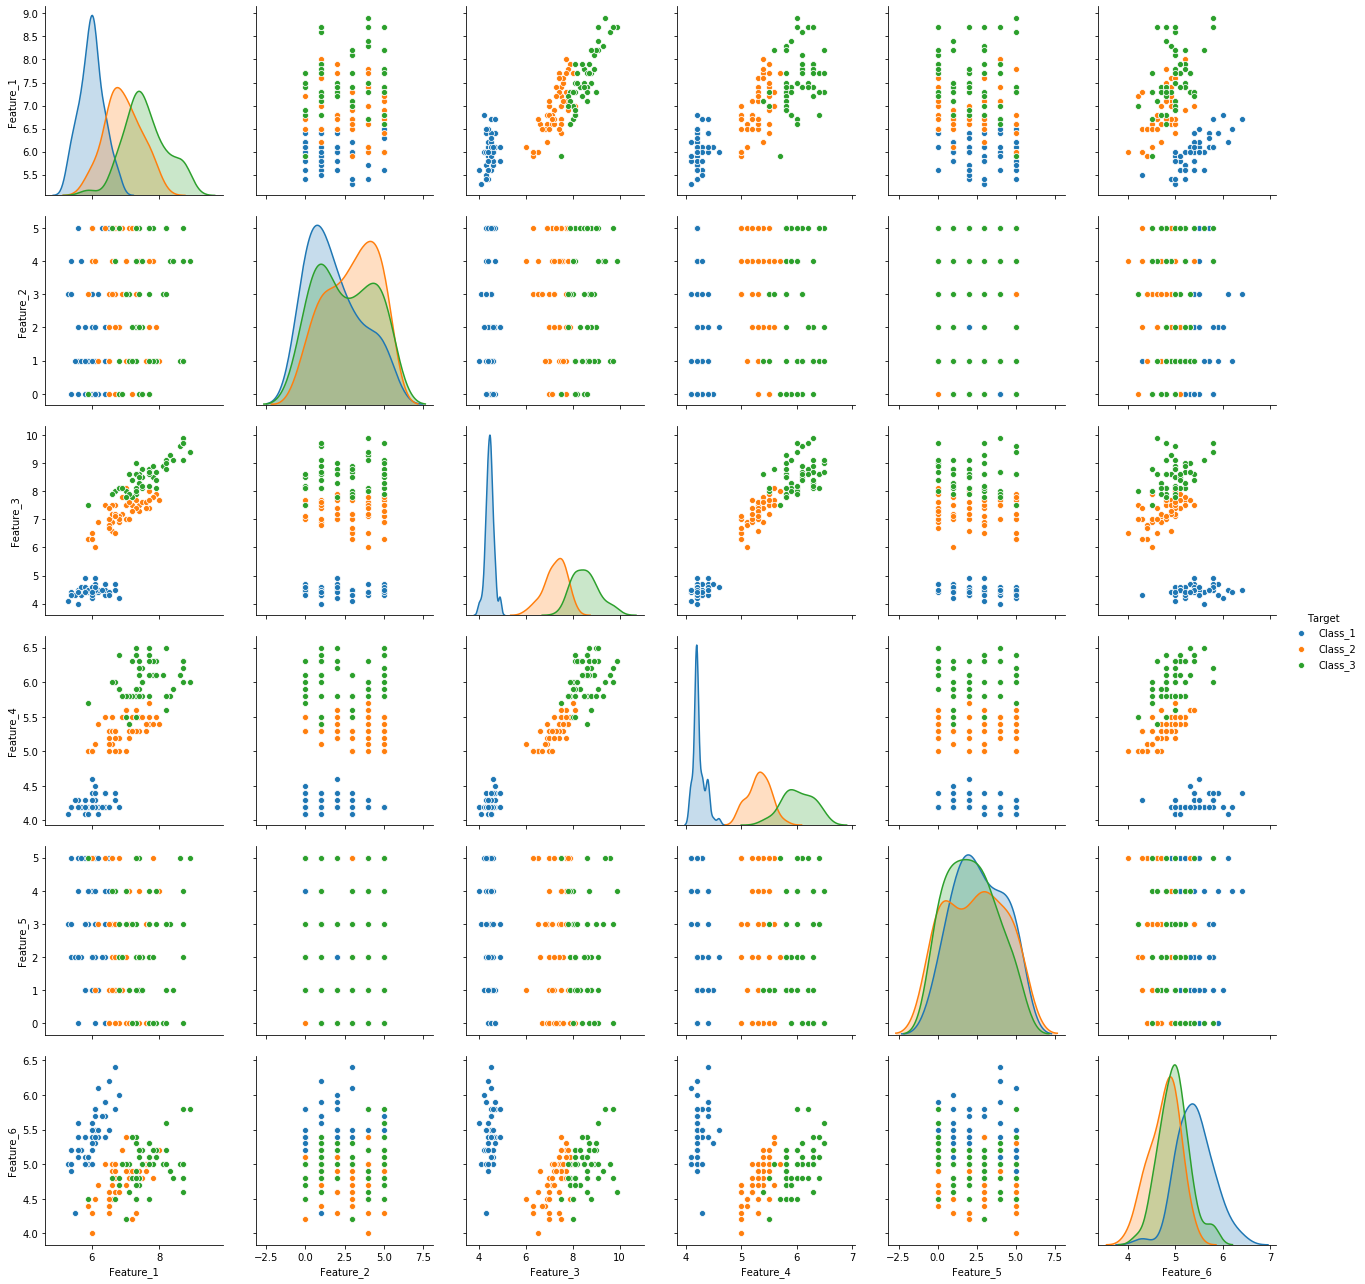

In [27]:
sns.pairplot(df,hue="Target",size=3)

In [36]:
corr_matrix = df.corr()

In [37]:
corr_matrix["Target"].sort_values(ascending=False)

target       1.000000
Target       1.000000
Feature_4    0.956464
Feature_3    0.949043
Feature_1    0.782561
Feature_2    0.158324
Feature_5   -0.122178
Feature_6   -0.419446
Name: Target, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002CD50FBDB08>,
      dtype=object)

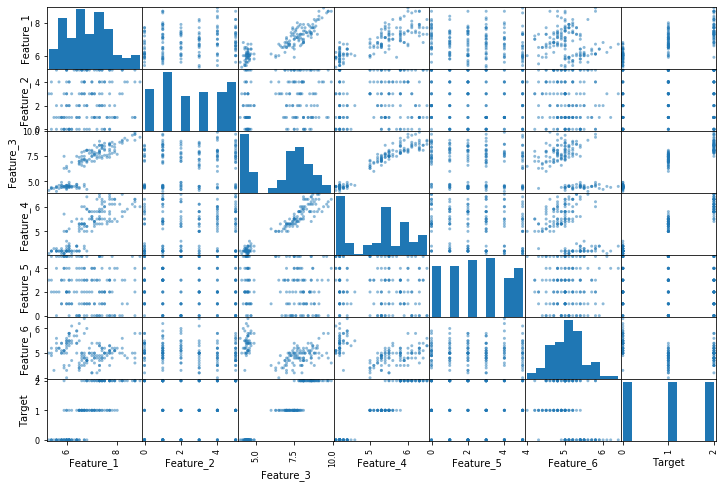

In [38]:
from pandas.plotting import scatter_matrix
attributes = ['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Target']
scatter_matrix(df[attributes], figsize=(12, 8))

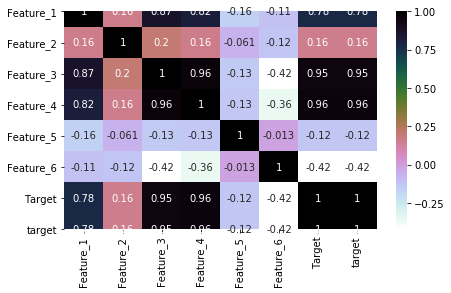

In [39]:
plt.figure(figsize=(7,4)) 
sns.heatmap(df.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(df.corr())
plt.show()

In [40]:
X = df.drop("Target",axis = 1)
y = df["Target"]

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [42]:
from sklearn.decomposition import PCA

PCA = PCA()
PCA.fit_transform(X_train.copy())
PCA.transform(X_test.copy())

explained_variance = PCA.explained_variance_ratio_
print(f"PC1: {explained_variance[0]:.3f}, PC2: {explained_variance[1]:.3f}, PC3: {explained_variance[2]:.3f}, PC4: {explained_variance[3]:.3f}")

PC1: 0.553, PC2: 0.157, PC3: 0.136, PC4: 0.122


In [43]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

PCA = PCA(n_components=1)
X_train_1 = PCA.fit_transform(X_train.copy())
X_test_1 = PCA.transform(X_test.copy())

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_1, y_train)

# Predicting the Test set results
y_pred_1 = classifier.predict(X_test_1)

CM = confusion_matrix(y_test, y_pred_1)
AC = accuracy_score(y_test, y_pred_1)

print(f"Confusion Matrix:\n\n {CM}\n\n Accuracy Score: {AC:.2f}")

Confusion Matrix:

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

 Accuracy Score: 1.00


In [44]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

PCA = PCA(n_components=2)
X_train_2 = PCA.fit_transform(X_train.copy())
X_test_2 = PCA.transform(X_test.copy())

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train_2, y_train)

# Predicting the Test set results
y_pred_2 = classifier.predict(X_test_2)

CM = confusion_matrix(y_test, y_pred_2)
AC = accuracy_score(y_test, y_pred_2)

print(f"Confusion Matrix:\n\n {CM}\n\n Accuracy Score: {AC:.2f}")

Confusion Matrix:

 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

 Accuracy Score: 1.00
